In [9]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [10]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# <font color = blue> IMDb Movie Assignment </font>

We have the data for the 100 top-rated movies from the past decade along with various pieces of information about the movie, its actors, and the voters who have rated these movies online. In this project, you will try to find some interesting insights into these movies and their voters, using Python.

## 1: Reading the data

### 1.1: Reading the Movies Data.

Reading the movies data file provided and storing it in a dataframe `movies`.

In [19]:
movies=pd.read_csv("F:/Decodr/Complete/Case Studies/Case Study 1 - Moview Reviews - Pandas/Movie+Assignment+Data.csv")
movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


###  1.2: Inspecting the Dataframe

Inspecting the dataframe for dimensions, null-values, and summary of different numeric columns.

In [20]:
movies.shape

(100, 62)

In [21]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 62 columns):
Title                     100 non-null object
title_year                100 non-null int64
budget                    100 non-null int64
Gross                     100 non-null int64
actor_1_name              100 non-null object
actor_2_name              100 non-null object
actor_3_name              100 non-null object
actor_1_facebook_likes    100 non-null int64
actor_2_facebook_likes    99 non-null float64
actor_3_facebook_likes    98 non-null float64
IMDb_rating               100 non-null float64
genre_1                   100 non-null object
genre_2                   97 non-null object
genre_3                   74 non-null object
MetaCritic                95 non-null float64
Runtime                   100 non-null int64
CVotes10                  100 non-null int64
CVotes09                  100 non-null int64
CVotes08                  100 non-null int64
CVotes07                  100 n

In [22]:
movies.describe()

,title_year,budget,Gross,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,MetaCritic,Runtime,CVotes10,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
count,100.000000,1.000000e+02,1.000000e+02,100.000000,99.000000,98.000000,100.000000,95.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2012.820000,7.838400e+07,1.468679e+08,13407.270000,7377.303030,3002.153061,7.883000,78.252632,126.420000,73212.160000,...,7.982000,7.732000,7.723000,7.780000,7.65100,7.624000,7.770000,7.274000,7.958000,7.793000
std,1.919491,7.445295e+07,1.454004e+08,10649.037862,13471.568216,6940.301133,0.247433,9.122066,19.050799,82669.594746,...,0.321417,0.251814,0.260479,0.282128,0.21485,0.213258,0.301344,0.361987,0.232327,0.264099
min,2010.000000,3.000000e+06,2.238380e+05,39.000000,12.000000,0.000000,7.500000,62.000000,91.000000,6420.000000,...,7.300000,7.300000,7.200000,7.200000,7.10000,7.100000,7.000000,6.400000,7.500000,7.300000
25%,2011.000000,1.575000e+07,4.199752e+07,1000.000000,580.000000,319.750000,7.700000,72.000000,114.750000,30587.000000,...,7.700000,7.600000,7.500000,7.600000,7.50000,7.475000,7.500000,7.100000,7.800000,7.600000
50%,2013.000000,4.225000e+07,1.070266e+08,13000.000000,1000.000000,626.500000,7.800000,78.000000,124.000000,54900.500000,...,8.000000,7.700000,7.700000,7.800000,7.65000,7.600000,7.800000,7.300000,7.950000,7.750000
75%,2014.000000,1.500000e+08,2.107548e+08,20000.000000,11000.000000,1000.000000,8.100000,83.500000,136.250000,80639.000000,...,8.200000,7.900000,7.900000,8.000000,7.80000,7.800000,7.925000,7.500000,8.100000,7.925000
max,2016.000000,2.600000e+08,9.366622e+08,35000.000000,96000.000000,46000.000000,8.800000,100.000000,180.000000,584839.000000,...,8.800000,8.700000,8.700000,8.500000,8.10000,8.100000,8.500000,8.200000,8.700000,8.800000


## 2: Data Analysis

Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data manipulation, analysis, and visualisation to get various insights about the data. 

###  2.1: Reducing those Digits!

These numbers in the `budget` and `gross` are too big, compromising its readability. Let's convert the unit of the `budget` and `gross` columns from `$` to `million $` first.

In [23]:
# Dividing the 'gross' and 'budget' columns by 1000000 to convert '$' to 'million $'
movies["Gross"]=movies["Gross"]/1000000
movies["budget"]=movies["budget"]/1000000
movies

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Whiplash,2014,3.3,13.092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.3,8.2,8.1,8.1,8.2,8.0,8.6,8.4,R,USA
96,Before Midnight,2013,3.0,8.114507,Seamus Davey-Fitzpatrick,Ariane Labed,Athina Rachel Tsangari,140,63.0,48.0,...,7.8,7.6,7.3,7.4,7.2,7.0,8.0,7.9,R,USA
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA
98,Harry Potter and the Deathly Hallows: Part I,2010,150.0,296.347721,Rupert Grint,Toby Jones,Alfred Enoch,10000,2000.0,1000.0,...,7.3,8.1,7.4,7.3,8.0,6.7,7.9,7.5,PG-13,UK


###  2.2: Let's Talk Profit!

We will be --
    1. Creating a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sorting the dataframe using the `profit` column as reference.
    3. Extracting the top ten profiting movies in descending order and store them in a new dataframe - `top10`.
    4. Ploting a scatter or a joint plot between the columns `budget` and `profit` and write a few words on what we observe.
    5. Extracting the movies with a negative profit and store them in a new dataframe - `neg_profit`

In [24]:
# Creating a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
movies["profit"]=movies["Gross"]- movies["budget"]
movies


,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
0,La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA,121.101803
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.268248
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia,39.738905
3,Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA,53.546139
4,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA,38.695371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Whiplash,2014,3.3,13.092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.2,8.1,8.1,8.2,8.0,8.6,8.4,R,USA,9.792000
96,Before Midnight,2013,3.0,8.114507,Seamus Davey-Fitzpatrick,Ariane Labed,Athina Rachel Tsangari,140,63.0,48.0,...,7.6,7.3,7.4,7.2,7.0,8.0,7.9,R,USA,5.114507
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225
98,Harry Potter and the Deathly Hallows: Part I,2010,150.0,296.347721,Rupert Grint,Toby Jones,Alfred Enoch,10000,2000.0,1000.0,...,8.1,7.4,7.3,8.0,6.7,7.9,7.5,PG-13,UK,146.347721


In [25]:
# Sorting the dataframe using the `profit` column as reference.

movies=movies.sort_values(by="profit",ascending=False)

In [26]:
# Extracting the top ten profiting movies in descending order and store them in a new dataframe - `top10`.

top10 = movies.iloc[:10,:]
top10

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225
11,The Avengers,2012,220.0,623.279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.279547
47,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263
32,The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577
12,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497
8,The Dark Knight Rises,2012,250.0,448.130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,...,8.2,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198.130642
45,The Lego Movie,2014,60.0,257.756197,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000.0,2000.0,...,7.5,7.4,7.4,7.4,7.2,8.0,7.6,PG,Australia,197.756197
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.268248
41,Despicable Me,2010,69.0,251.501645,Steve Carell,Miranda Cosgrove,Jack McBrayer,7000,2000.0,975.0,...,7.9,7.6,7.5,7.9,7.0,7.6,7.6,PG,USA,182.501645
18,Inside Out,2015,175.0,356.454367,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0,...,8.1,7.9,7.9,7.9,7.6,8.2,8.1,PG,USA,181.454367


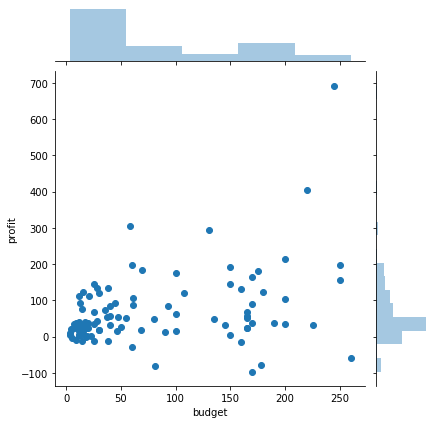

In [29]:
# Ploting a scatter or a joint plot between the columns `budget` and `profit` and write a few words on what we observe.

sns.jointplot("budget","profit",movies)
plt.show()

The dataset contains the 100 best performing movies from the year 2010 to 2016. However scatter plot tells a different story. You can notice that there are some movies with negative profit. Although good movies do incur losses, but there appear to be quite a few movie with losses. What can be the reason behind this? Lets have a closer look at this by finding the movies with negative profit.

In [30]:
movies.columns

Index(['Title', 'title_year', 'budget', 'Gross', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'actor_1_facebook_likes',
       'actor_2_facebook_likes', 'actor_3_facebook_likes', 'IMDb_rating',
       'genre_1', 'genre_2', 'genre_3', 'MetaCritic', 'Runtime', 'CVotes10',
       'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06', 'CVotes05', 'CVotes04',
       'CVotes03', 'CVotes02', 'CVotes01', 'CVotesMale', 'CVotesFemale',
       'CVotesU18', 'CVotesU18M', 'CVotesU18F', 'CVotes1829', 'CVotes1829M',
       'CVotes1829F', 'CVotes3044', 'CVotes3044M', 'CVotes3044F', 'CVotes45A',
       'CVotes45AM', 'CVotes45AF', 'CVotes1000', 'CVotesUS', 'CVotesnUS',
       'VotesM', 'VotesF', 'VotesU18', 'VotesU18M', 'VotesU18F', 'Votes1829',
       'Votes1829M', 'Votes1829F', 'Votes3044', 'Votes3044M', 'Votes3044F',
       'Votes45A', 'Votes45AM', 'Votes45AF', 'Votes1000', 'VotesUS',
       'VotesnUS', 'content_rating', 'Country', 'profit'],
      dtype='object')

In [31]:
#Finding the movies with negative profit

neg_profit = movies[movies["profit"]<0]

In [32]:
neg_profit

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
99,Tucker and Dale vs Evil,2010,5.0,0.223838,Katrina Bowden,Tyler Labine,Chelan Simmons,948,779.0,440.0,...,7.7,7.5,7.4,7.7,7.1,7.7,7.5,R,Canada,-4.776162
89,Amour,2012,8.9,0.225377,Isabelle Huppert,Emmanuelle Riva,Jean-Louis Trintignant,678,432.0,319.0,...,7.9,7.9,7.8,8.1,7.2,7.9,7.8,PG-13,France,-8.674623
56,Rush,2013,38.0,26.903709,Chris Hemsworth,Olivia Wilde,Alexandra Maria Lara,26000,10000.0,471.0,...,7.9,7.8,7.8,7.8,7.1,7.9,8.1,R,UK,-11.096291
66,Warrior,2011,25.0,13.651662,Tom Hardy,Frank Grillo,Kevin Dunn,27000,798.0,581.0,...,8.0,7.7,7.7,7.5,7.1,8.2,8.1,PG-13,USA,-11.348338
82,Flipped,2010,14.0,1.752214,Madeline Carroll,Rebecca De Mornay,Aidan Quinn,1000,872.0,767.0,...,7.7,7.4,7.3,7.6,6.4,7.5,7.7,PG,USA,-12.247786
28,X-Men: First Class,2011,160.0,146.405371,Jennifer Lawrence,Michael Fassbender,Oliver Platt,34000,13000.0,1000.0,...,7.8,7.6,7.5,7.7,7.3,7.8,7.7,PG-13,USA,-13.594629
46,Scott Pilgrim vs. the World,2010,60.0,31.494270,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,1000.0,719.0,...,7.2,7.1,7.1,7.0,6.6,7.8,7.4,PG-13,USA,-28.505730
7,Tangled,2010,260.0,200.807262,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,...,8.0,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA,-59.192738
17,Edge of Tomorrow,2014,178.0,100.189501,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.0,509.0,...,7.7,7.8,7.8,7.8,7.5,8.0,7.8,PG-13,USA,-77.810499
39,The Little Prince,2015,81.2,1.339152,Jeff Bridges,James Franco,Mackenzie Foy,12000,11000.0,6000.0,...,7.9,7.5,7.4,7.9,6.6,7.7,7.7,PG,France,-79.860848


**`Checkpoint 1:`** We spot the movie `Tangled` in the dataset. Although its one of the highest grossing movies of all time, it has negative profit as per this result. If we cross check the gross values of this movie (link: https://www.imdb.com/title/tt0398286/), we can see that the gross in the dataset accounts only for the domestic gross and not the worldwide gross. This is true for may other movies also in the list.

### 2.3: The General Audience and the Critics

Ther is a column `MetaCritic` in this dataset. This is a very popular website where an average score is determined through the scores given by the top-rated critics. Second, there is also another column `IMDb_rating` which tells the IMDb rating of a movie. This rating is determined by taking the average of hundred-thousands of ratings from the general audience. 

Let's find the highest rated movies which have been liked by critics and audiences alike.
1. Firstly we will notice that the `MetaCritic` score is on a scale of `100` whereas the `IMDb_rating` is on a scale of 10. Let's convert the `MetaCritic` column to a scale of 10.
2. Now, to find out the movies which have been liked by both critics and audiences alike and also have a high rating overall -
    - Creating a new column `Avg_rating` which will have the average of the `MetaCritic` and `Rating` columns
    - Then retain only the movies in which the absolute difference(using abs() function) between the `IMDb_rating` and `Metacritic` columns is less than 0.5. 
    - Last sorting these values in a descending order of `Avg_rating` and retain only the movies with a rating equal to higher than `8` and store these movies in a new dataframe `UniversalAcclaim`.
    

In [33]:
# Changing the scale of MetaCritic

movies["MetaCritic"]=movies["MetaCritic"]/10

In [34]:
# Finding the average ratings

movies["Avg_rating"]=(movies["IMDb_rating"]+movies["MetaCritic"])/2

In [35]:
movies

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225,8.10
11,The Avengers,2012,220.0,623.279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.279547,7.50
47,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263,7.25
32,The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577,7.60
12,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497,8.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,Scott Pilgrim vs. the World,2010,60.0,31.494270,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,1000.0,719.0,...,7.1,7.1,7.0,6.6,7.8,7.4,PG-13,USA,-28.505730,7.20
7,Tangled,2010,260.0,200.807262,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,...,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA,-59.192738,7.45
17,Edge of Tomorrow,2014,178.0,100.189501,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.0,509.0,...,7.8,7.8,7.8,7.5,8.0,7.8,PG-13,USA,-77.810499,7.50
39,The Little Prince,2015,81.2,1.339152,Jeff Bridges,James Franco,Mackenzie Foy,12000,11000.0,6000.0,...,7.5,7.4,7.9,6.6,7.7,7.7,PG,France,-79.860848,7.40


In [36]:
#Sorting in descending order of average rating
df=movies[["Title","IMDb_rating","MetaCritic","Avg_rating"]]
df=df.loc[abs(df["IMDb_rating"]-df["MetaCritic"]<0.5)]
df

,Title,IMDb_rating,MetaCritic,Avg_rating
97,Star Wars: Episode VII - The Force Awakens,8.1,8.1,8.10
32,The Hunger Games: Catching Fire,7.6,7.6,7.60
12,Toy Story 3,8.3,9.2,8.75
45,The Lego Movie,7.8,8.3,8.05
1,Zootopia,8.1,7.8,7.95
18,Inside Out,8.2,9.4,8.80
34,Gravity,7.8,9.6,8.70
9,Captain America: Civil War,7.9,7.5,7.70
55,True Grit,7.6,8.0,7.80
76,The King's Speech,8.0,8.8,8.40


In [37]:
# Finding the movies with metacritic-IMDb_rating < 0.5 and also with the average rating of >8
df=df.sort_values(by="Avg_rating",ascending=False)
UniversalAcclaim=df.loc[df["Avg_rating"]>=8]
UniversalAcclaim

,Title,IMDb_rating,MetaCritic,Avg_rating
94,Boyhood,7.9,10.0,8.95
69,12 Years a Slave,8.1,9.6,8.85
18,Inside Out,8.2,9.4,8.80
12,Toy Story 3,8.3,9.2,8.75
0,La La Land,8.2,9.3,8.75
4,Manchester by the Sea,7.9,9.6,8.75
70,Spotlight,8.1,9.3,8.70
34,Gravity,7.8,9.6,8.70
96,Before Midnight,7.9,9.4,8.65
89,Amour,7.9,9.4,8.65


### 2.4: Find the Most Popular Trios - I

#### Problem Statement

You're a producer looking to make a blockbuster movie. There will primarily be three lead roles in your movie and you wish to cast the most popular actors for it. Now, since you don't want to take a risk, you will cast a trio which has already acted in together in a movie before. The metric that you've chosen to check the popularity is the Facebook likes of each of these actors.

The dataframe has three columns to help you out for the same, viz. `actor_1_facebook_likes`, `actor_2_facebook_likes`, and `actor_3_facebook_likes`. Your objective is to find the trios which has the most number of Facebook likes combined. That is, the sum of `actor_1_facebook_likes`, `actor_2_facebook_likes` and `actor_3_facebook_likes` should be maximum.
Find out the top 5 popular trios, and output their names in a list.


In [38]:
group=movies.pivot_table(values=["actor_1_facebook_likes","actor_2_facebook_likes","actor_3_facebook_likes"],
                  aggfunc="sum",index=["actor_1_name","actor_2_name","actor_3_name"])
group

actor_1_facebook_likes  \
actor_1_name  actor_2_name    actor_3_name                                   
Aidan Turner  Adam Brown      James Nesbitt                          10000   
Albert Finney Helen McCrory   Rory Kinnear                             883   
Aldis Hodge   Neil Brown Jr.  R. Marcos Taylor                         559   
Amy Adams     Jeremy Renner   Forest Whitaker                        35000   
Amy Poehler   Mindy Kaling    Phyllis Smith                           1000   
...                                                                    ...   
Tom Hanks     Mark Rylance    Amy Ryan                               15000   
Tom Hardy     Charlize Theron ZoÃ« Kravitz                           27000   
              Christian Bale  Joseph Gordon-Levitt                   27000   
              Frank Grillo    Kevin Dunn                             27000   
Tom Hughes    Tom Hollander   Lindsay Duncan                           565   

                                                    actor_2_facebook_likes  \
actor_1_name  actor_2_name    actor_3_name                                   
Aidan Turner  Adam Brown      James Nesbitt                         1944.0   
Albert Finney Helen McCrory   Rory Kinnear                           563.0   
Aldis Hodge   Neil Brown Jr.  R. Marcos Taylor                       427.0   
Amy Adams     Jeremy Renner   Forest Whitaker                       5300.0   
Amy Poehler   Mindy Kaling    Phyllis Smith                          767.0   
...                                                                    ...   
Tom Hanks     Mark Rylance    Amy Ryan                               535.0   
Tom Hardy     Charlize Theron ZoÃ« Kravitz                          9000.0   
              Christian Bale  Joseph Gordon-Levitt                 23000.0   
              Frank Grillo    Kevin Dunn                             798.0   
Tom Hughes    Tom Hollander   Lindsay Duncan                         555.0   

                                                    actor_3_facebook_likes  
actor_1_name  actor_2_name    actor_3_name                                  
Aidan Turner  Adam Brown      James Nesbitt                         1546.0  
Albert Finney Helen McCrory   Rory Kinnear                           393.0  
Aldis Hodge   Neil Brown Jr.  R. Marcos Taylor                       303.0  
Amy Adams     Jeremy Renner   Forest Whitaker                          0.0  
Amy Poehler   Mindy Kaling    Phyllis Smith                          384.0  
...                                                                    ...  
Tom Hanks     Mark Rylance    Amy Ryan                               423.0  
Tom Hardy     Charlize Theron ZoÃ« Kravitz                           943.0  
              Christian Bale  Joseph Gordon-Levitt                 23000.0  
              Frank Grillo    Kevin Dunn                             581.0  
Tom Hughes    Tom Hollander   Lindsay Duncan                         171.0  

[99 rows x 3 columns]

In [39]:
group["Total likes"]=group["actor_1_facebook_likes"]+group["actor_2_facebook_likes"]+group["actor_3_facebook_likes"]
group

actor_1_facebook_likes  \
actor_1_name  actor_2_name    actor_3_name                                   
Aidan Turner  Adam Brown      James Nesbitt                          10000   
Albert Finney Helen McCrory   Rory Kinnear                             883   
Aldis Hodge   Neil Brown Jr.  R. Marcos Taylor                         559   
Amy Adams     Jeremy Renner   Forest Whitaker                        35000   
Amy Poehler   Mindy Kaling    Phyllis Smith                           1000   
...                                                                    ...   
Tom Hanks     Mark Rylance    Amy Ryan                               15000   
Tom Hardy     Charlize Theron ZoÃ« Kravitz                           27000   
              Christian Bale  Joseph Gordon-Levitt                   27000   
              Frank Grillo    Kevin Dunn                             27000   
Tom Hughes    Tom Hollander   Lindsay Duncan                           565   

                                                    actor_2_facebook_likes  \
actor_1_name  actor_2_name    actor_3_name                                   
Aidan Turner  Adam Brown      James Nesbitt                         1944.0   
Albert Finney Helen McCrory   Rory Kinnear                           563.0   
Aldis Hodge   Neil Brown Jr.  R. Marcos Taylor                       427.0   
Amy Adams     Jeremy Renner   Forest Whitaker                       5300.0   
Amy Poehler   Mindy Kaling    Phyllis Smith                          767.0   
...                                                                    ...   
Tom Hanks     Mark Rylance    Amy Ryan                               535.0   
Tom Hardy     Charlize Theron ZoÃ« Kravitz                          9000.0   
              Christian Bale  Joseph Gordon-Levitt                 23000.0   
              Frank Grillo    Kevin Dunn                             798.0   
Tom Hughes    Tom Hollander   Lindsay Duncan                         555.0   

                                                    actor_3_facebook_likes  \
actor_1_name  actor_2_name    actor_3_name                                   
Aidan Turner  Adam Brown      James Nesbitt                         1546.0   
Albert Finney Helen McCrory   Rory Kinnear                           393.0   
Aldis Hodge   Neil Brown Jr.  R. Marcos Taylor                       303.0   
Amy Adams     Jeremy Renner   Forest Whitaker                          0.0   
Amy Poehler   Mindy Kaling    Phyllis Smith                          384.0   
...                                                                    ...   
Tom Hanks     Mark Rylance    Amy Ryan                               423.0   
Tom Hardy     Charlize Theron ZoÃ« Kravitz                           943.0   
              Christian Bale  Joseph Gordon-Levitt                 23000.0   
              Frank Grillo    Kevin Dunn                             581.0   
Tom Hughes    Tom Hollander   Lindsay Duncan                         171.0   

                                                    Total likes  
actor_1_name  actor_2_name    actor_3_name                       
Aidan Turner  Adam Brown      James Nesbitt             13490.0  
Albert Finney Helen McCrory   Rory Kinnear               1839.0  
Aldis Hodge   Neil Brown Jr.  R. Marcos Taylor           1289.0  
Amy Adams     Jeremy Renner   Forest Whitaker           40300.0  
Amy Poehler   Mindy Kaling    Phyllis Smith              2151.0  
...                                                         ...  
Tom Hanks     Mark Rylance    Amy Ryan                  15958.0  
Tom Hardy     Charlize Theron ZoÃ« Kravitz              36943.0  
              Christian Bale  Joseph Gordon-Levitt      73000.0  
              Frank Grillo    Kevin Dunn                28379.0  
Tom Hughes    Tom Hollander   Lindsay Duncan             1291.0  

[99 rows x 4 columns]

In [41]:
group.sort_values(by="Total likes",ascending=False,inplace=True)
group

,,,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,Total likes
actor_1_name,actor_2_name,actor_3_name,,,,
Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,138800.0
Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,79000.0
Jennifer Lawrence,Peter Dinklage,Hugh Jackman,34000,22000.0,20000.0,76000.0
Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,74818.0
Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,73000.0
...,...,...,...,...,...,...
Ellar Coltrane,Lorelei Linklater,Libby Villari,230,193.0,127.0,550.0
Elina Alminas,Sonoya Mizuno,Corey Johnson,149,145.0,123.0,417.0
Seamus Davey-Fitzpatrick,Ariane Labed,Athina Rachel Tsangari,140,63.0,48.0,251.0


In [42]:
group.reset_index(inplace=True)
group

,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,Total likes
0,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,138800.0
1,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,79000.0
2,Jennifer Lawrence,Peter Dinklage,Hugh Jackman,34000,22000.0,20000.0,76000.0
3,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,74818.0
4,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,73000.0
...,...,...,...,...,...,...,...
94,Ellar Coltrane,Lorelei Linklater,Libby Villari,230,193.0,127.0,550.0
95,Elina Alminas,Sonoya Mizuno,Corey Johnson,149,145.0,123.0,417.0
96,Seamus Davey-Fitzpatrick,Ariane Labed,Athina Rachel Tsangari,140,63.0,48.0,251.0
97,Doug Walker,Rob Walker,0,131,12.0,0.0,143.0


In [43]:
top5_group=group.iloc[0:5,:]
top5_group

,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,Total likes
0,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,138800.0
1,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,79000.0
2,Jennifer Lawrence,Peter Dinklage,Hugh Jackman,34000,22000.0,20000.0,76000.0
3,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,74818.0
4,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,73000.0


### 2.5: Find the Most Popular Trios - II

In the previous group we found the popular trio based on the total number of facebook likes. Let's add a small condition to it and make sure that all three actors are popular. The condition is **none of the three actors' Facebook likes should be less than half of the other two**. For example, the following is a valid combo:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 50000

But the below one is not:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 30000

since in this case, `actor_3_facebook_likes` is 30000, which is less than half of `actor_1_facebook_likes`.

Having this condition we have to make sure that there aren't getting any unpopular actor in your trio (since the total likes calculated in the previous group Dataframe doesn't tell anything about the individual popularities of each actor in the trio.).

We can do a manual inspection of the top 5 popular trios we have found in the previous subtask and check how many of those trios satisfy this condition. Also, which is the most popular trio after applying the condition above?

In [44]:
group

,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,Total likes
0,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,138800.0
1,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,79000.0
2,Jennifer Lawrence,Peter Dinklage,Hugh Jackman,34000,22000.0,20000.0,76000.0
3,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,74818.0
4,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,73000.0
...,...,...,...,...,...,...,...
94,Ellar Coltrane,Lorelei Linklater,Libby Villari,230,193.0,127.0,550.0
95,Elina Alminas,Sonoya Mizuno,Corey Johnson,149,145.0,123.0,417.0
96,Seamus Davey-Fitzpatrick,Ariane Labed,Athina Rachel Tsangari,140,63.0,48.0,251.0
97,Doug Walker,Rob Walker,0,131,12.0,0.0,143.0


In [48]:
group.columns = ['actor_1_name', 'actor_2_name', 'actor_3_name',
       'af1', 'af2', 'af3', 'Total likes']
group

,actor_1_name,actor_2_name,actor_3_name,af1,af2,af3,Total likes
0,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,138800.0
1,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,79000.0
2,Jennifer Lawrence,Peter Dinklage,Hugh Jackman,34000,22000.0,20000.0,76000.0
3,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,74818.0
4,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,73000.0
...,...,...,...,...,...,...,...
94,Ellar Coltrane,Lorelei Linklater,Libby Villari,230,193.0,127.0,550.0
95,Elina Alminas,Sonoya Mizuno,Corey Johnson,149,145.0,123.0,417.0
96,Seamus Davey-Fitzpatrick,Ariane Labed,Athina Rachel Tsangari,140,63.0,48.0,251.0
97,Doug Walker,Rob Walker,0,131,12.0,0.0,143.0


In [69]:
group_with_cndn = group[group[['af1', 'af2', 'af3']].min(axis=1) / group[['af1', 'af2', 'af3']].max(axis=1) > 0.5]
group_with_cndn

,actor_1_name,actor_2_name,actor_3_name,af1,af2,af3,Total likes
1,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,79000.0
2,Jennifer Lawrence,Peter Dinklage,Hugh Jackman,34000,22000.0,20000.0,76000.0
4,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,73000.0
6,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,66000.0
11,Robert Downey Jr.,Scarlett Johansson,Chris Evans,21000,19000.0,11000.0,51000.0
15,Hugh Jackman,Eddie Redmayne,Anne Hathaway,20000,13000.0,11000.0,44000.0
33,Matthew McConaughey,Anne Hathaway,Mackenzie Foy,11000,11000.0,6000.0,28000.0
73,Jack McBrayer,Sarah Silverman,Joe Lo Truglio,975,931.0,833.0,2739.0
74,Madeline Carroll,Rebecca De Mornay,Aidan Quinn,1000,872.0,767.0,2639.0
75,BÃ©rÃ©nice Bejo,Ed Lauter,Beth Grant,996,897.0,628.0,2521.0


In [72]:
group_with_cndn.shape

(18, 7)

In [76]:
print(f'No. of trios that satisfy the above condition: {group_with_cndn.shape[0]}')
print(f'Most popular trio after applying the condition:')
print(f"1> {group_with_cndn.iloc[0]['actor_1_name']}")
print(f"2> {group_with_cndn.iloc[0]['actor_2_name']}")
print(f"3> {group_with_cndn.iloc[0]['actor_3_name']}")

No. of trios that satisfy the above condition: 18
Most popular trio after applying the condition:
1> Leonardo DiCaprio
2> Tom Hardy
3> Joseph Gordon-Levitt


### 2.6: Runtime Analysis

There is a column named `Runtime` in the dataframe which primarily shows the length of the movie. It might be intersting to see how this variable is distributed. Ploting a `histogram` or `distplot` of seaborn to find the `Runtime` range most of the movies fall into.

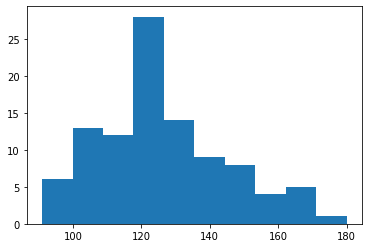

In [77]:
# Runtime histogram/density plot
plt.hist(movies["Runtime"])
plt.show()

Most of the movies appear to be sharply 2 hour-long.

### 2.7: R-Rated Movies

Although R rated movies are restricted movies for the under 18 age group, still there are vote counts from that age group. Among all the R rated movies that have been voted by the under-18 age group, finding the top 10 movies that have the highest number of votes i.e.`CVotesU18` from the `movies` dataframe. Storing these in a dataframe named `PopularR`.

In [79]:
PopularR = movies.loc[movies["content_rating"]=="R"].sort_values(by="CVotesU18",ascending=False)[["Title","CVotesU18"]].head(10)
PopularR

,Title,CVotesU18
47,Deadpool,4598
36,The Wolf of Wall Street,3622
35,Django Unchained,3250
29,Mad Max: Fury Road,3159
95,Whiplash,2878
31,The Revenant,2619
40,Shutter Island,2321
43,Gone Girl,2286
65,The Grand Budapest Hotel,2083
72,Birdman or (The Unexpected Virtue of Ignorance),1891


Kids are watching `Deadpool` a lot

## 3 : Demographic analysis

If we take a look at the last columns in the dataframe, most of these are related to demographics of the voters (in the last point, i.e., 2.7, we made use one of these columns - CVotesU18). We also have three genre columns indicating the genres of a particular movie. We will extensively use these columns for the third and the final stage of this assignment wherein we will analyse the voters across all demographics and also see how these vary across various genres. So without further ado, let's get started with `demographic analysis`.

### 3.1 Combine the Dataframe by Genres

There are 3 columns in the dataframe - `genre_1`, `genre_2`, and `genre_3`. We need to aggregate a few values over these 3 columns. 
1. First create a new dataframe `df_by_genre` that contains `genre_1`, `genre_2`, and `genre_3` and all the columns related to **CVotes/Votes** from the `movies` data frame. There are 47 columns to be extracted in total.
2. Now, Add a column called `cnt` to the dataframe `df_by_genre` and initialize it to one. We will realise the use of this column next.
3. First group the dataframe `df_by_genre` by `genre_1` and find the sum of all the numeric columns such as `cnt`, columns related to CVotes and Votes columns and store it in a dataframe `df_by_g1`.
4. Performing the same operation for `genre_2` and `genre_3` and storing it dataframes `df_by_g2` and `df_by_g3` respectively. 
5. Now that we have 3 dataframes performed by grouping over `genre_1`, `genre_2`, and `genre_3` separately, it's time to combine them. For this, adding the three dataframes and store it in a new dataframe `df_add`, so that the corresponding values of Votes/CVotes get added for each genre.
6. The column `cnt` on aggregation has basically kept the track of the number of occurences of each genre.Subseting the genres that have atleast 10 movies into a new dataframe `genre_top10` based on the `cnt` column value.
7. Now, taking the mean of all the numeric columns by dividing them with the column value `cnt` and store it back to the same dataframe. We will be using this dataframe for further analysis unless it is explicitly mentioned to use the dataframe `movies`.
8. Since the number of votes can't be a fraction, type casting all the CVotes related columns to integers. Also, rounding off all the Votes related columns upto two digits after the decimal point.


In [80]:
# Creating the dataframe df_by_genre
df_by_genre=movies.loc[:,"CVotes10":"VotesnUS"]
df_by_genre[["genre_1","genre_2","genre_3"]]=movies[["genre_1","genre_2","genre_3"]]
df_by_genre

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,genre_1,genre_2,genre_3
97,155391,161810,166378,99402,40734,18060,8751,5970,4489,15768,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,Action,Adventure,Fantasy
11,260257,234203,264290,162604,67579,27957,12176,7201,4996,15528,...,8.1,7.9,7.9,8.1,7.4,8.3,7.9,Action,Sci-Fi,NaN
47,147467,147966,170810,105717,41811,15510,7046,4273,3037,8538,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,Action,Adventure,Comedy
32,85219,83874,150153,121748,50575,18571,7591,4094,2675,6978,...,7.9,7.3,7.2,7.9,6.7,7.7,7.4,Action,Adventure,Mystery
12,139773,149992,158704,88289,31291,11850,4859,2932,2119,6586,...,8.3,8.1,8.1,8.1,8.1,8.5,8.3,Animation,Adventure,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,47292,48976,79198,59689,28452,13451,6977,4254,3069,6287,...,7.2,7.1,7.1,7.0,6.6,7.8,7.4,Action,Comedy,Romance
7,56575,54688,97207,70947,26805,8530,3043,1396,805,1606,...,8.0,7.7,7.6,7.9,6.9,7.9,7.7,Animation,Adventure,Comedy
17,60383,99596,175961,100724,28982,8145,2858,1368,857,1661,...,7.7,7.8,7.8,7.8,7.5,8.0,7.8,Action,Adventure,Sci-Fi
39,7565,7321,11668,8558,3370,1162,456,227,158,293,...,7.9,7.5,7.4,7.9,6.6,7.7,7.7,Animation,Adventure,Drama


In [81]:
# Createing a column cnt and initialize it to 1
df_by_genre["cnt"]=1
df_by_genre

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,genre_1,genre_2,genre_3,cnt
97,155391,161810,166378,99402,40734,18060,8751,5970,4489,15768,...,7.9,7.8,8.2,7.7,8.2,7.9,Action,Adventure,Fantasy,1
11,260257,234203,264290,162604,67579,27957,12176,7201,4996,15528,...,7.9,7.9,8.1,7.4,8.3,7.9,Action,Sci-Fi,NaN,1
47,147467,147966,170810,105717,41811,15510,7046,4273,3037,8538,...,7.8,7.8,7.9,7.3,8.1,7.9,Action,Adventure,Comedy,1
32,85219,83874,150153,121748,50575,18571,7591,4094,2675,6978,...,7.3,7.2,7.9,6.7,7.7,7.4,Action,Adventure,Mystery,1
12,139773,149992,158704,88289,31291,11850,4859,2932,2119,6586,...,8.1,8.1,8.1,8.1,8.5,8.3,Animation,Adventure,Comedy,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,47292,48976,79198,59689,28452,13451,6977,4254,3069,6287,...,7.1,7.1,7.0,6.6,7.8,7.4,Action,Comedy,Romance,1
7,56575,54688,97207,70947,26805,8530,3043,1396,805,1606,...,7.7,7.6,7.9,6.9,7.9,7.7,Animation,Adventure,Comedy,1
17,60383,99596,175961,100724,28982,8145,2858,1368,857,1661,...,7.8,7.8,7.8,7.5,8.0,7.8,Action,Adventure,Sci-Fi,1
39,7565,7321,11668,8558,3370,1162,456,227,158,293,...,7.5,7.4,7.9,6.6,7.7,7.7,Animation,Adventure,Drama,1


In [82]:
df_by_genre[["genre_1","genre_2","genre_3"]]

,genre_1,genre_2,genre_3
97,Action,Adventure,Fantasy
11,Action,Sci-Fi,NaN
47,Action,Adventure,Comedy
32,Action,Adventure,Mystery
12,Animation,Adventure,Comedy
...,...,...,...
46,Action,Comedy,Romance
7,Animation,Adventure,Comedy
17,Action,Adventure,Sci-Fi
39,Animation,Adventure,Drama


In [83]:
# Grouping the movies by individual genres
df_by_g1=df_by_genre.groupby("genre_1").aggregate(np.sum)
df_by_g2=df_by_genre.groupby("genre_2").aggregate(np.sum)
df_by_g3=df_by_genre.groupby("genre_3").aggregate(np.sum)
df_by_g1

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
genre_1,,,,,,,,,,,,,,,,,,,,,
Action,2928407,3261919,4247693,2662020,986774,364234,156150,89483,61975,162426,...,209.1,208.8,210.0,206.5,206.0,209.0,197.2,215.8,209.5,27
Adventure,1058779,1179818,1560541,966275,365486,136985,58559,33174,22018,48100,...,92.7,92.6,93.5,92.0,91.6,93.8,88.9,95.3,93.5,12
Animation,681562,798227,1153214,722782,251076,83069,30718,15733,10026,25193,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11
Biography,666831,1088430,1654704,962977,306247,100005,38874,21536,15365,37469,...,100.8,100.7,101.3,100.5,100.0,102.9,94.7,103.3,101.5,13
Comedy,371217,496905,770395,518566,205434,81933,35788,20965,15286,33241,...,68.6,68.7,68.9,67.7,67.5,68.7,62.7,70.9,69.4,9
Crime,383290,690221,1083469,627593,206756,71460,30336,17190,11757,25839,...,69.4,69.7,68.8,68.7,68.6,69.6,66.3,71.9,70.1,9
Drama,1080725,1494053,1827363,1078966,417205,163874,75525,45846,32068,71464,...,139.3,139.0,139.7,137.7,137.2,138.7,130.0,143.2,141.1,18
Mystery,150405,230844,278844,132349,45167,15615,7061,3780,2662,4703,...,7.9,7.9,8.0,7.5,7.4,7.6,7.6,7.8,8.1,1


In [84]:
df_by_g2

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
genre_2,,,,,,,,,,,,,,,,,,,,,
Action,238060,285510,430062,260106,88580,29250,10820,5521,3598,8821,...,30.9,30.7,31.8,30.5,30.4,31.4,29.0,31.8,31.1,4
Adventure,2297820,2548864,3271725,2055600,758009,272735,113691,64623,44121,116937,...,171.0,170.4,173.9,169.2,168.4,172.8,162.7,176.4,171.6,22
Biography,185172,313178,576374,370003,119348,38643,14844,7974,5248,13828,...,38.3,38.2,38.5,38.0,37.9,38.8,35.4,39.4,38.4,5
Comedy,428995,624720,854162,512668,193916,76752,35193,20995,14798,30509,...,54.0,54.1,53.4,53.0,53.1,53.1,51.0,55.5,54.3,7
Crime,19576,40247,85359,64633,24920,8548,3261,1669,970,1689,...,7.5,7.6,7.2,7.6,7.6,7.4,7.2,7.8,7.6,1
Drama,1923492,2761237,4112363,2492241,853434,300100,124511,70205,49642,112896,...,270.2,270.4,270.1,267.9,267.1,271.8,253.4,278.2,272.6,35
Family,68937,54947,102488,80465,31205,11792,4808,2454,1617,4522,...,7.4,7.3,8.1,7.4,7.3,8.0,6.7,7.9,7.5,1
Fantasy,270616,290831,447307,291071,120920,47215,19848,10871,6885,14702,...,22.9,22.9,23.3,23.0,22.8,23.7,22.1,23.4,23.2,3
History,15757,32840,83322,63800,19183,5178,1657,735,419,878,...,7.5,7.5,7.5,7.7,7.6,7.9,7.4,7.7,7.5,1


In [85]:
df_by_g3

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
genre_3,,,,,,,,,,,,,,,,,,,,,
Adventure,238060,285510,430062,260106,88580,29250,10820,5521,3598,8821,...,30.9,30.7,31.8,30.5,30.4,31.4,29.0,31.8,31.1,4
Comedy,583404,653362,882294,559835,200937,68167,26488,14258,9307,24617,...,54.8,54.6,56.0,54.3,54.1,55.3,51.7,56.2,55.2,7
Crime,171660,236650,250667,129164,46715,18682,8674,5854,4258,9689,...,8.0,8.1,7.7,7.6,7.6,7.5,7.8,8.1,8.1,1
Drama,400221,680085,1167327,748493,258717,88338,35439,19075,12475,26948,...,91.8,91.7,92.0,91.2,91.0,92.7,86.1,94.5,92.3,12
Family,29228,40728,77893,62936,27932,11179,4664,2674,1700,3023,...,7.4,7.4,7.4,7.5,7.5,7.6,7.4,7.7,7.5,1
Fantasy,301836,311392,442460,308676,120911,46269,19555,11362,7808,24139,...,30.4,30.2,31.7,30.4,30.0,31.8,28.4,31.5,30.5,4
History,135504,227547,311209,159262,48678,16055,6307,3649,2729,8413,...,23.7,23.6,23.8,23.3,23.1,24.2,22.0,24.5,23.7,3
Music,74245,71191,64640,38831,17377,8044,3998,2839,2407,6802,...,7.9,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,1
Mystery,274446,443661,654167,375087,128131,44818,18755,10578,7149,17825,...,30.8,30.8,31.5,30.4,30.3,31.3,29.3,31.9,31.3,4


In [86]:
# Adding the grouped data frames and store it in a new data frame
df_add=df_by_g1.add(df_by_g2,fill_value=0)
df_add=df_add.add(df_by_g3,fill_value=0)
df_add

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,171247.0,...,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
Adventure,3594659.0,4014192.0,5262328.0,3281981.0,1212075.0,438970.0,183070.0,103318.0,69737.0,173858.0,...,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38.0
Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,51297.0,...,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0
Comedy,1383616.0,1774987.0,2506851.0,1591069.0,600287.0,226852.0,97469.0,56218.0,39391.0,88367.0,...,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23.0
Crime,574526.0,967118.0,1419495.0,821390.0,278391.0,98690.0,42271.0,24713.0,16985.0,37217.0,...,84.9,85.4,83.7,83.9,83.8,84.5,81.3,87.8,85.8,11.0
Drama,3404438.0,4935375.0,7107053.0,4319700.0,1529356.0,552312.0,235475.0,135126.0,94185.0,211308.0,...,501.3,501.1,501.8,496.8,495.3,503.2,469.5,515.9,506.0,65.0
Family,98165.0,95675.0,180381.0,143401.0,59137.0,22971.0,9472.0,5128.0,3317.0,7545.0,...,14.8,14.7,15.5,14.9,14.8,15.6,14.1,15.6,15.0,2.0
Fantasy,572452.0,602223.0,889767.0,599747.0,241831.0,93484.0,39403.0,22233.0,14693.0,38841.0,...,53.3,53.1,55.0,53.4,52.8,55.5,50.5,54.9,53.7,7.0
History,151261.0,260387.0,394531.0,223062.0,67861.0,21233.0,7964.0,4384.0,3148.0,9291.0,...,31.2,31.1,31.3,31.0,30.7,32.1,29.4,32.2,31.2,4.0


In [87]:
# Extracting genres with atleast 10 occurences
genre_top_10=df_add.loc[df_add["cnt"]>10]


In [88]:
genre_top_10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,171247.0,...,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
Adventure,3594659.0,4014192.0,5262328.0,3281981.0,1212075.0,438970.0,183070.0,103318.0,69737.0,173858.0,...,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38.0
Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,51297.0,...,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0
Comedy,1383616.0,1774987.0,2506851.0,1591069.0,600287.0,226852.0,97469.0,56218.0,39391.0,88367.0,...,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23.0
Crime,574526.0,967118.0,1419495.0,821390.0,278391.0,98690.0,42271.0,24713.0,16985.0,37217.0,...,84.9,85.4,83.7,83.9,83.8,84.5,81.3,87.8,85.8,11.0
Drama,3404438.0,4935375.0,7107053.0,4319700.0,1529356.0,552312.0,235475.0,135126.0,94185.0,211308.0,...,501.3,501.1,501.8,496.8,495.3,503.2,469.5,515.9,506.0,65.0
Romance,549959.0,689492.0,1069280.0,712841.0,281289.0,110901.0,48913.0,27698.0,19200.0,40075.0,...,98.9,98.9,99.6,97.8,97.5,98.9,89.9,101.8,100.1,13.0
Sci-Fi,2325284.0,2530855.0,3002994.0,1802098.0,671811.0,254175.0,111925.0,65904.0,46171.0,114435.0,...,133.6,133.5,133.2,131.1,130.8,131.5,127.9,137.5,134.0,17.0
Thriller,1081701.0,1465491.0,1993378.0,1175799.0,416046.0,149953.0,65281.0,37940.0,25767.0,57630.0,...,100.6,100.7,100.1,99.6,99.3,100.7,96.2,103.1,101.5,13.0


In [89]:
# Taking the mean for every column by dividing with cnt 
genre_top_10.iloc[:,0:-1]=genre_top_10.iloc[:,0:-1].divide(genre_top_10["cnt"],axis=0)
genre_top_10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,102144.096774,114433.193548,150895.322581,94262.129032,34688.838710,12693.032258,5386.129032,3064.645161,2115.258065,5524.096774,...,7.741935,7.725806,7.800000,7.645161,7.625806,7.754839,7.296774,7.987097,7.761290,31.0
Adventure,94596.289474,105636.631579,138482.315789,86367.921053,31896.710526,11551.842105,4817.631579,2718.894737,1835.184211,4575.210526,...,7.752632,7.728947,7.873684,7.676316,7.642105,7.842105,7.384211,7.986842,7.794737,38.0
Animation,61960.181818,72566.090909,104837.636364,65707.454545,22825.090909,7551.727273,2792.545455,1430.272727,911.454545,2290.272727,...,7.763636,7.718182,7.981818,7.681818,7.645455,7.881818,7.272727,7.963636,7.827273,11.0
Biography,47333.500000,77867.111111,123948.777778,74054.444444,23644.166667,7702.666667,2984.333333,1639.444444,1145.166667,2849.833333,...,7.727778,7.716667,7.766667,7.694444,7.661111,7.872222,7.227778,7.927778,7.772222,18.0
Comedy,60157.217391,77173.347826,108993.521739,69176.913043,26099.434783,9863.130435,4237.782609,2444.260870,1712.652174,3842.043478,...,7.713043,7.713043,7.752174,7.608696,7.595652,7.700000,7.191304,7.939130,7.778261,23.0
Crime,52229.636364,87919.818182,129045.000000,74671.818182,25308.272727,8971.818182,3842.818182,2246.636364,1544.090909,3383.363636,...,7.718182,7.763636,7.609091,7.627273,7.618182,7.681818,7.390909,7.981818,7.800000,11.0
Drama,52375.969231,75928.846154,109339.276923,66456.923077,23528.553846,8497.107692,3622.692308,2078.861538,1449.000000,3250.892308,...,7.712308,7.709231,7.720000,7.643077,7.620000,7.741538,7.223077,7.936923,7.784615,65.0
Romance,42304.538462,53037.846154,82252.307692,54833.923077,21637.615385,8530.846154,3762.538462,2130.615385,1476.923077,3082.692308,...,7.607692,7.607692,7.661538,7.523077,7.500000,7.607692,6.915385,7.830769,7.700000,13.0
Sci-Fi,136781.411765,148873.823529,176646.705882,106005.764706,39518.294118,14951.470588,6583.823529,3876.705882,2715.941176,6731.470588,...,7.858824,7.852941,7.835294,7.711765,7.694118,7.735294,7.523529,8.088235,7.882353,17.0
Thriller,83207.769231,112730.076923,153336.769231,90446.076923,32003.538462,11534.846154,5021.615385,2918.461538,1982.076923,4433.076923,...,7.738462,7.746154,7.700000,7.661538,7.638462,7.746154,7.400000,7.930769,7.807692,13.0


In [90]:
# Rounding off the columns of Votes to two decimals
genre_top_10.loc[:,"VotesM":"VotesnUS"]=round(genre_top_10.loc[:,"VotesM":"VotesnUS"],2)
genre_top_10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,102144.096774,114433.193548,150895.322581,94262.129032,34688.838710,12693.032258,5386.129032,3064.645161,2115.258065,5524.096774,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
Adventure,94596.289474,105636.631579,138482.315789,86367.921053,31896.710526,11551.842105,4817.631579,2718.894737,1835.184211,4575.210526,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
Animation,61960.181818,72566.090909,104837.636364,65707.454545,22825.090909,7551.727273,2792.545455,1430.272727,911.454545,2290.272727,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.0
Biography,47333.500000,77867.111111,123948.777778,74054.444444,23644.166667,7702.666667,2984.333333,1639.444444,1145.166667,2849.833333,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0
Comedy,60157.217391,77173.347826,108993.521739,69176.913043,26099.434783,9863.130435,4237.782609,2444.260870,1712.652174,3842.043478,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0
Crime,52229.636364,87919.818182,129045.000000,74671.818182,25308.272727,8971.818182,3842.818182,2246.636364,1544.090909,3383.363636,...,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11.0
Drama,52375.969231,75928.846154,109339.276923,66456.923077,23528.553846,8497.107692,3622.692308,2078.861538,1449.000000,3250.892308,...,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78,65.0
Romance,42304.538462,53037.846154,82252.307692,54833.923077,21637.615385,8530.846154,3762.538462,2130.615385,1476.923077,3082.692308,...,7.61,7.61,7.66,7.52,7.50,7.61,6.92,7.83,7.70,13.0
Sci-Fi,136781.411765,148873.823529,176646.705882,106005.764706,39518.294118,14951.470588,6583.823529,3876.705882,2715.941176,6731.470588,...,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88,17.0
Thriller,83207.769231,112730.076923,153336.769231,90446.076923,32003.538462,11534.846154,5021.615385,2918.461538,1982.076923,4433.076923,...,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81,13.0


In [91]:
# Converting CVotes to int type
genre_top_10[genre_top_10.loc[:,"CVotes10":"CVotesnUS"].columns]=genre_top_10[genre_top_10.loc[:,"CVotes10":"CVotesnUS"].columns].astype(int)
genre_top_10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,5524,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,4575,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
Animation,61960,72566,104837,65707,22825,7551,2792,1430,911,2290,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.0
Biography,47333,77867,123948,74054,23644,7702,2984,1639,1145,2849,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0
Comedy,60157,77173,108993,69176,26099,9863,4237,2444,1712,3842,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0
Crime,52229,87919,129045,74671,25308,8971,3842,2246,1544,3383,...,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11.0
Drama,52375,75928,109339,66456,23528,8497,3622,2078,1449,3250,...,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78,65.0
Romance,42304,53037,82252,54833,21637,8530,3762,2130,1476,3082,...,7.61,7.61,7.66,7.52,7.50,7.61,6.92,7.83,7.70,13.0
Sci-Fi,136781,148873,176646,106005,39518,14951,6583,3876,2715,6731,...,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88,17.0
Thriller,83207,112730,153336,90446,32003,11534,5021,2918,1982,4433,...,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81,13.0


If we take a look at the final dataframe that we got, we will see that, now we have the complete information about all the demographic (Votes- and CVotes-related) columns across the top 10 genres. We can use this dataset to extract exciting insights about the voters!

###  3.2: Genre Counts!

Now let's derive some insights from this data frame. Making a bar chart plotting different genres vs cnt using seaborn.

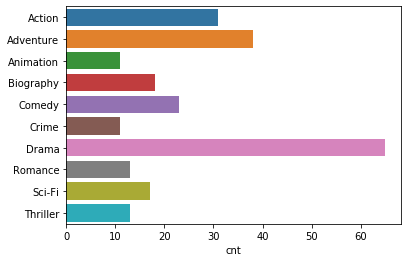

In [92]:
# Countplot for genres
sns.barplot(x=genre_top_10["cnt"],y=genre_top_10.index)
plt.show()


We the bar for `Drama` is tallest

###  3.3: Gender and Genre

If we look closely at the Votes- and CVotes-related columns, we might have noticed the suffixes `F` and `M` indicating Female and Male. Since we have the vote counts for both males and females, across various age groups, let's now see how the popularity of genres vary between the two genders in the dataframe. 

1. Making the first heatmap to see how the average number of votes of males is varying across the genres. Useing seaborn heatmap for this analysis. The X-axis should contain the four age-groups for males, i.e., `CVotesU18M`,`CVotes1829M`, `CVotes3044M`, and `CVotes45AM`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-male group. 

2. Making the second heatmap to see how the average number of votes of females is varying across the genres. Useing seaborn heatmap for this analysis. The X-axis should contain the four age-groups for females, i.e., `CVotesU18F`,`CVotes1829F`, `CVotes3044F`, and `CVotes45AF`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-female group. 

3. Making sure that we plot these heatmaps side by side using `subplots` so that we can easily compare the two genders and derive insights.

4. Writing our any three inferences from this plot. We can make use of the previous bar plot also here for better insights.




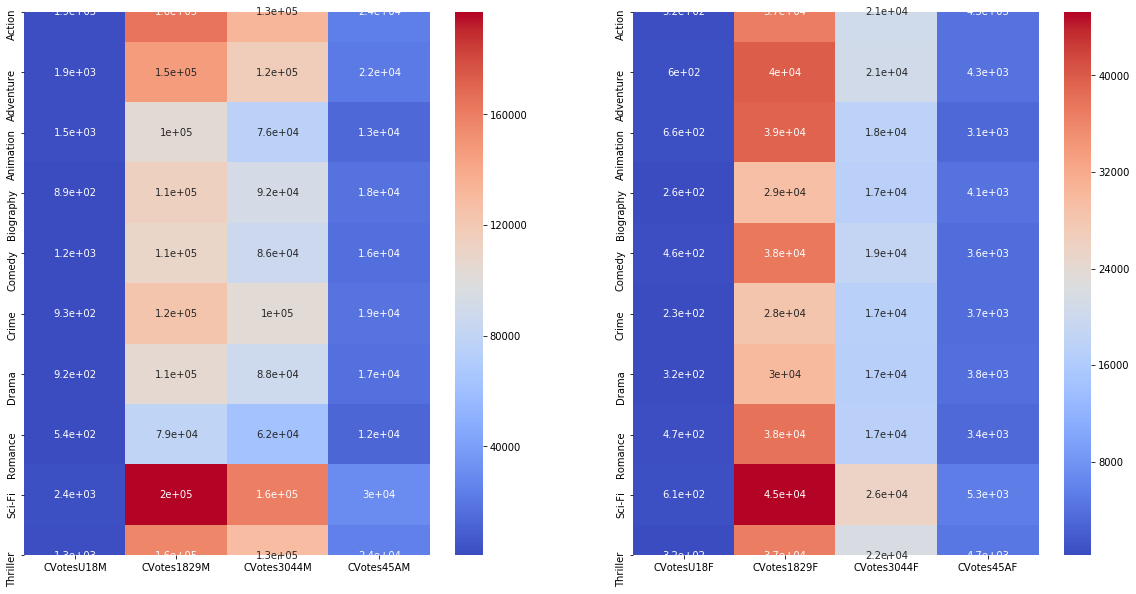

In [93]:
# 1st set of heat maps for CVotes-related columns
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
ax=sns.heatmap(genre_top_10[["CVotesU18M","CVotes1829M","CVotes3044M","CVotes45AM"]],annot=True,cmap="coolwarm")
plt.subplot(1,2,2)

ax=sns.heatmap(genre_top_10[["CVotesU18F","CVotes1829F","CVotes3044F","CVotes45AF"]],annot=True,cmap="coolwarm")
plt.show()

**`Inferences:`** A few inferences that can be seen from the heatmap above is that males have voted more than females, and Sci-Fi appears to be most popular among the 18-29 age group irrespective of their gender. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- Inference 1: Genre romance has got the least number of votes among any age group of males, but there is no such pattern among the females
- Inference 2:Action seems to be the more popular genre among the under 18 males, and Animation appears to be the most popular genre among under 18 females.
- Inference 3: 18-29 age group seems to be most actively voting for any genre irrespective of gender

**`Inferences:`** Sci-Fi appears to be the highest rated genre in the age group of U18 for both males and females. Also, females in this age group have rated it a bit higher than the males in the same age group. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- Inference 1:
- Inference 2:
- Inference 3: